
# Clase 7: Modelos de regresión lineal múltiple



## Variables categóricas y modelos múltiples: Subastas de Ebay de Mario Kart para Wii

Hasta el momento, hemos visto modelos de regresión simple con variables explicativas de tipo numéricas. Pero evidentemente, las variables categóricas también son útiles para predecir resultados. Vamos a introducir el uso de estas variables con el siguiente ejemplo, donde  consideramos un predictor categórico con dos niveles. Tenemos un dataset de subastas de Ebay para un videojuego, Mario Kart para Nintendo Wii, donde se registraron tanto el precio total de la subasta como la condición del juego. Aquí queremos predecir el precio total según la condición del juego, que toma los valores usado y nuevo. Leamos el dataset y exploremos un poco:


In [1]:
import pandas as pd

mariokart = pd.read_csv('mariokart.csv')
mariokart.head()

,id,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels,title
0,150377422259,3,20,new,0.99,4.00,51.55,standard,1580,yes,1,~~ Wii MARIO KART &amp; WHEEL ~ NINTENDO Wii ~...
1,260483376854,7,13,used,0.99,3.99,37.04,firstClass,365,yes,1,Mariokart Wii Nintendo with wheel - Mario Kart...
2,320432342985,3,16,new,0.99,3.50,45.50,firstClass,998,no,1,Mario Kart Wii (Wii)
3,280405224677,3,18,new,0.99,0.00,44.00,standard,7,yes,1,Brand New Mario Kart Wii Comes with Wheel. Fre...
4,170392227765,1,20,new,0.01,0.00,71.00,media,820,yes,2,BRAND NEW NINTENDO 1 WII MARIO KART WITH 2 WHE...


In [2]:
mariokart.dtypes

id               int64
duration         int64
n_bids           int64
cond            object
start_pr       float64
ship_pr        float64
total_pr       float64
ship_sp         object
seller_rate      int64
stock_photo     object
wheels           int64
title           object
dtype: object

En principio, para incorporar la variable de condición del juego en una ecuación de regresión, es necesario convertir la(s) categorías a una forma numérica. La manera matemática clásica de hacerlo es usando una variable binaria (o un conjunto de $n-1$ variables binarias para 3 o más categorías de una misma variable), que toma valor 1 cuando la observación tiene una categoría determinada y 0 cuando no la tiene. Estas variables también son típicamente llamadas variables *dummy*.   

Luego, creamos una variable llamada `cond_new` que es 1 cuando el juego es nuevo y 0 cuando es usado. Usando esta variable, el modelo lineal podría escribirse como:  

$$\hat{price} = \beta_0 + \beta_1 \cdot cond\_new $$

OJO, `total_pr` es el precio de venta más el precio de envío. 
Si queremos modelar solo el precio de venta, debemos construir esta variable también

In [3]:
# creando variable cond_new

mariokart['cond_new'] = mariokart['cond'].map({'new': 1, 'used': 0})

mariokart[['cond','cond_new']].head()

# creando variable price

mariokart['price'] = mariokart['total_pr']-mariokart['ship_pr']


Noten que la variable `cond` está como `object` (está siendo leída como string). En `pandas`, es posible especificar esta variable como un tipo especial llamado `category`, donde se explicita que esta es una variable categórica. Esto tiene muchas ventajas, tales como disminuir tiempos de lectura, de cálculo y de ajuste de modelos, pero por ahora veamos primero como nos funciona nuestra variable dummy creada.  Para hacerlo, se puede usar el método `astype`. Esto se vuelve bien relevante para poder disminuir tiempos de cómputo y para definir variables de base, pero por ahora dejémoslo así y veamos que pasa.

Ajustemos un modelo de regresión simple con `statsmodels`. Importamos las librerías correspondientes.

In [4]:


import statsmodels.api as sm

import statsmodels.formula.api as smf



Noten que llamamos `statsmodels.formula.api` además de `statsmodels.api`.
Esto porque `formula.api` contiene muchas de las mismas funciones de `api` (e.g. OLS, GLM), pero también tiene las mismas funciones con minúsculas para la mayoría de estos modelos, ya que estos aceptan argumentos `formula` (tipo `R`) y `df`(dataframes de pandas), mientras que las con mayúscula aceptan las matrices `endog` y `exog`. 


In [5]:


mod = smf.ols(formula='price ~ cond_new', data=mariokart)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.204
Date:                Sat, 15 Oct 2022   Prob (F-statistic):             0.0756
Time:                        16:38:10   Log-Likelihood:                -655.84
No. Observations:                 143   AIC:                             1316.
Df Residuals:                     141   BIC:                             1322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.7369      2.609     16.764      0.0

In [6]:
# Extraemos los parámetros del modelo para luego hacemos un gráfico de los datos y el ajuste

params = res.params
print(params)


Intercept    43.736905
cond_new      7.270892
dtype: float64


Text(0.5, 1.0, 'Regresión de precio en función de condición')

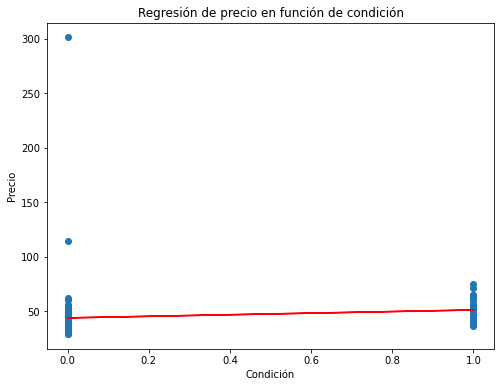

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(mariokart['cond_new'], mariokart['price'], "o", label="Data")
ax.plot(mariokart['cond_new'], params['Intercept']+params['cond_new']*mariokart['cond_new']  , "r-", label="Predicted")
ax.set_ylabel("Precio")
ax.set_xlabel("Condición")
ax.set_title("Regresión de precio en función de condición")


Vemos que hay dos outliers bien evidentes. Vamos a explorar que sucede con ellos más adelante. Ahora veamos, ¿Qué pasa si usamos la variable `cond` en vez de `cond_new` en el modelo?

In [8]:
mod2 = smf.ols(formula='price ~ cond', data=mariokart)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.204
Date:                Sat, 15 Oct 2022   Prob (F-statistic):             0.0756
Time:                        16:38:11   Log-Likelihood:                -655.84
No. Observations:                 143   AIC:                             1316.
Df Residuals:                     141   BIC:                             1322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       51.0078      3.113     16.385   

Noten que el modelo ajustado por `statsmodels` asumió a `cond` como una variable categórica.
¿Cómo se comparan ambos modelos? ¿Qué cambia y qué se mantiene?


## ¿Cómo interpretamos los estimadores de predictores categóricos?

El intercepto estimado es el valor de la variable de respuesta para la primera categoría o categoría de base(es decir, la categoría correspondiente a un valor de indicador de 0). La pendiente estimada es el cambio promedio en la variable de respuesta entre las dos categorías.  

Es decir, para el primer modelo, el intercepto es el precio estimado cuando `cond_new` toma valor 0, o sea, cuando el juego es usado. Es decir, el precio de venta promedio de una versión usada del juego es de $43.73 aproximadamente. La pendiente indica que, en promedio, los juegos nuevos se venden por alrededor de $7.27 más que los juegos usados.

### Mas de una categoría: creando dummies, o declarando categorías:

Hagamos un segundo modelo, donde la variable explicativa sea el método de envío (que tiene más de dos categorías). Acá, la manera matemática de expresar estas categorías es básicamente crear variables *dummies* para cada categoría con excepción de una categoría que la dejamos de base. Esto porque si asumimos que cada observación puede y tiene que tener una sola categoría en esta variable categórica, siempre es posible escribir la última dummy como una combinación lineal de las otras. Dicho de otra manera, como en la variable `ship_sp` las categorías que existen en el dataset son: `['standard', 'firstClass', 'media', 'upsGround', 'priority','parcel', 'other', 'ups3Day']`, si tengo dummies para todas ellas, puedo tomar cualquiera, por ejemplo `upsGround`, y predecirla sin error usando las otras variables, ya que sencillamente `upsGround` tendrá valor 1 cuando todas las demás tengan valor 0 y valor 0 cuando alguna de las demás tenga valor 1. Esta multicolinealidad perfecta impide calcular el determinante de la matriz que calcula los estimadores, quedando con infinitas soluciones, lo que no nos informa nada del modelo. Por tanto, debemos tomar una categoría base para que el modelo pueda ajustar y podamos tener una interpretación de los coeficientes. En principio, podemos elegir cualquier categoría, pero hay que recordar que la interpretación del coeficiente será la comparación de la categoría respecto a la categoría base. 



In [9]:
# veamos este nuevo modelo
mod3 = smf.ols(formula='price ~ ship_sp', data=mariokart)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.876
Date:                Sat, 15 Oct 2022   Prob (F-statistic):             0.0782
Time:                        16:38:11   Log-Likelihood:                -650.81
No. Observations:                 143   AIC:                             1318.
Df Residuals:                     135   BIC:                             1341.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               39.2591 

La categoría base es `firstClass`. Cambiemos la categoría base por la categoría con mayor frecuencia. Para ello, podemos cambiar el tipo de variable en pandas, o indicar la categoría base al correr el modelo


In [10]:
mariokart['ship_sp'].value_counts()


standard      33
upsGround     31
priority      23
firstClass    22
parcel        16
media         14
other          3
ups3Day        1
Name: ship_sp, dtype: int64

In [11]:
# cambiar categoría base en statmodels y correr modelo
mod3a = smf.ols(formula='price ~ C(ship_sp, Treatment(reference = "standard"))', data=mariokart)
res3a = mod3a.fit()
print(res3a.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.876
Date:                Sat, 15 Oct 2022   Prob (F-statistic):             0.0782
Time:                        16:38:12   Log-Likelihood:                -650.81
No. Observations:                 143   AIC:                             1318.
Df Residuals:                     135   BIC:                             1341.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

¿Cómo interpreto estos coeficientes? ¿Es lo que esperábamos? ¿Por qué?

In [12]:
# cambiar categoría base en pandas
mariokart['ship_sp'] = pd.Categorical(mariokart['ship_sp'], categories=mariokart['ship_sp'].unique())
# estos datos tienen dos atributos: ordered, que puede ser True o False, 
# y categories que da el orden de las categorías, donde 
# si ordered es True, es el orden rankeado de menor a mayor,
# y si ordered es False, es por defecto el orden alfabético 
# y la primera categoría queda como categoría base en cualquier modelo.
#mariokart['ship_sp'].describe()


In [13]:
# cambiar categoría base a standard


mariokart['ship_sp'] = mariokart['ship_sp'].cat.set_categories(['standard','firstClass', 'media', 'other', 'parcel', 'priority', 'ups3Day', 'upsGround'])
mariokart['ship_sp'].cat.categories

Index(['standard', 'firstClass', 'media', 'other', 'parcel', 'priority',
       'ups3Day', 'upsGround'],
      dtype='object')

In [14]:
#correr modelo
mod3b = smf.ols(formula='price ~ ship_sp', data=mariokart)
res3b = mod3b.fit()
print(res3b.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.876
Date:                Sat, 15 Oct 2022   Prob (F-statistic):             0.0782
Time:                        16:38:12   Log-Likelihood:                -650.81
No. Observations:                 143   AIC:                             1318.
Df Residuals:                     135   BIC:                             1341.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                44.74


## Chequeo del modelo y sus supuestos

El análisis de robustez o chequeo de supuestos nos permite analizar en qué medida el modelo es una buena representación de las asociaciones entre variables.  



Para predictores categóricos con solo dos niveles, la suposición de linealidad siempre se cumplirá. Sin embargo, debemos evaluar si los residuos en cada grupo son aproximadamente normales y tienen una varianza aproximadamente igual. Como puede verse en la figura 8.16, los datos de la subasta satisfacen razonablemente estas dos condiciones.


### 1. **Linealidad:** 
 Debe haber una relación lineal entre la variable explicada y la variable explicativa. Una forma en que se puede expresar la linealidad se relaciona con la **distribución de los residuos**.  
   En presencia de linealidad se esperaría que los residuos se distribuyan **aleatoriamente** en torno a la recta de regresión (representada por los valores predichos).  
 
 **Detección de problemas:**  
Gráfico de valores predichos (en x) contra residuos (en y)

* Los residuos deben ser independientes de los valores
predichos. 
* Cualquier correlación entre los residuos y los valores predichos violarían este supuesto.
* Si los residuos muestran una patrón no lineal, como una relación curvilinea, el modelo esta especificado incorrectamente.

 **Corrección: ¿Qué hacer en caso de no-linealidad?**   

* descartar observaciones influyentes
* transformación de variables, ej: polinomial, logarítmica

**Transformación logarítmica**: 
* utilizada para variables con un alto sesgo en su distribución 
* pondera crecientemente las diferencias entre los valores de la escala
* caso típico: ingreso
  



In [15]:
# testeando linealidad: 
# Harvey-Collier multiplier test for Null hypothesis 
# that the linear specification is correct:
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

name = ["t value", "p value"]
test = sms.linear_harvey_collier(res)
lzip(name, test)

[('t value', -1.0142527022342043), ('p value', 0.31222440579193667)]

In [16]:
# Estimar normalidad de los residuos:
# Jarque_Bera test
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)


NameError: name 'results' is not defined

In [17]:
# Omni test
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(results.resid)
lzip(name, test)

NameError: name 'results' is not defined


 
### 2. **Observaciones influyentes:**  
   * Un *outlier* o valor atípico es una observación que es considerablemente distinta de la mayoría de los datos. Pueden ser causados por errores de registro/medición (en cuyo caso deben ser corregidos/removidos) o pueden ser casos que el modelo no explique bien pero que contengan información importante. 
   * Un punto con alto *leverage* (*apalancamiento*) es una observación que tiene un valor muy inusual (respecto al general de observaciones) en la variable explicativa.   
   * Un punto *influyente* es una observación cuya presencia/ausencia genera un cambio importante en la estimación de los coeficientes de regresión. No todo outlier es una observación influyente, pero toda observación influyente es un outlier. 
 
 **Detección de problemas:**  

 Identificando influyentes: Distancia de Cook
Se trata de una diferencia de la predicción del modelo con y sin
la observación , ponderada por el número de parametros en el
modelo (p) y la media cuadrática del error (MSE).

Se establece un punto de corte de $4/(n − k − 1)$, valores mayores
se consideran influyentes -> outliers con alta capacidad de
palanca.
$$DCook =\frac{\sum{(\hat{y_j} − \hat{y_{j(i)}} )^2}}{p \cdot MSE}$$


 **Corrección:**   

* estimar Cook para todas las observaciones
* detectar observaciones con Cook > punto de corte = influyentes
* re-estimar modelo sin las observaciones y comparar resultados


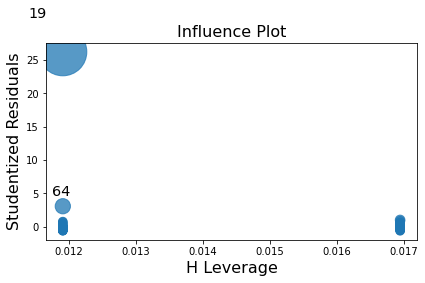

In [18]:
# Gráfico de puntos influyentes
fig = sm.graphics.influence_plot(res, criterion="cooks")
fig.tight_layout(pad=1.0)

In [19]:
#  Clase OLSInfluence de statsmodels
from statsmodels.stats.outliers_influence import OLSInfluence

test_class = OLSInfluence(results)
test_class.dfbetas[:5, :]

NameError: name 'results' is not defined

NameError: name 'results' is not defined

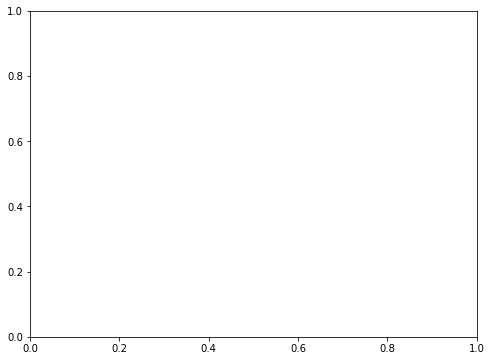

In [20]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(results, ax=ax)


### 3. Homoscedasticidad (homogeneidad de varianza de los residuos a lo largo de los valores predichos):
Cuando hay heteroscedasticidad en los residuos, la estimación de los parámetros y su significancia estadística pueden verse afectada.
 
 **Detección de Heteroscedasticidad:**  

* Mediante inspección visual de gráficos de XX contra XX

* Usando test de White
  
* Usando test de Goldfeld-Quandt

se contrasta la hipótesis nula de que la varianza del error es
constante (=no diferencias), y la hipótesis alternativa de que
el error de la varianza no es constante.
por lo tanto, se busca no rechazar la hipótesis nula y valores
p>0.05
26


In [22]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Breusch-Pagan test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

#Goldfeld-Quandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

NameError: name 'results' is not defined



 **Corrección de Heteroscedasticidad:**   
Se corrige estimando un modelo de regresión que calcule los errores estándar robustos a heteroscedasticidad ()
 



### 4. No multicolinealidad

Para poder calcular los estimadores de mínimos cuadrados, se requiere que no exista una relación lineal exacta entre los regresores, es decir, que no existe *multicolinealidad perfecta*  en el modelo, o en otras palabras, que ningún predictor puede ser una combinación lineal de los otros predictores. En general, esto no suele presentarse en la práctica salvo que el modelo esté mal diseñado. Lo que sí es más frecuente es que haya una relación *aproximadamente lineal* entre los regresores, en cuyo caso los estimadores obtenidos serán en general poco precisos, pues se produce una inflación de los errores estándar. A esta situación se le llama * *multicolinealidad imperfecta*.


 **Detectando multicolinealidad:**  

Variance Inflation Factor (VIF):  
Teniendo un modelo multiple con $i$ variables explicativas, el VIF asociado a cada variable se calcula en base a un modelo donde $x_i$ es la variable de respuesta y las otras $x$ son las variables explicativas. Entonces, 

$$VIF_i  = \frac{1}{1-{R_{x_i}}^2 }$$

Mientras mayor es el ${R_{x_i}}^2$, más pequeño el denominador y más grande será el VIF, que indicará alta multicolinealidad para esa variable en ese modelo con $i$ variables predictoras. 
Si ${R_{x_i}}^2 =0 , VIF_i=1$, y no hay colinealidad. En general, se suele considerar problemático encontrar variables con VIF mayores a 5 (otros umbrales típicos son 2.5 y 10)

**¿Cuándo es un problema y cuando no lo es?**

La multicolinealidad es un problema solo para las variables que son colineales, ya que altera los errores estándar y hace a los coeficientes inestables en varias formas. Sin embargo, muchas otras características del modelo se mantienen, por lo cual hay varias situaciones donde un VIF alto no es algo muy problemático.

* Cuando el modelo busca predecir y no explicar. Supongamos que ajustamos un modelo predictivo de alturas de un grupo de personas en función de otras variables: peso, longitud del brazo, longitud de la pierna, etc. con datos de entrenamiento para luego testearlo. La multicolinealidad en los datos de entrenamiento solo debería reducir el rendimiento predictivo en el conjunto de datos de prueba si la covarianza entre las variables en los datos de entrenamiento y los datos de prueba son diferentes. Si la estructura de covarianza (y, en consecuencia, la multicolinealidad) es similar en los datos de entrenamiento como los de prueba, entonces no representa un problema para la predicción. Y como los datos de prueba suelen ser un subconjunto aleatorio del dataset completo, generalmente es razonable suponer que la estructura de covarianza es la misma.
En el mismo ejemplo de las alturas, es bien esperable que las variables explicativas que nombramos posiblemente estén fuertemente correlacionadas en el dataset de entrenamiento, pero si podemos asumir que la longitud de los brazos, la longitud de las piernas, el peso, etc. están correlacionados de manera similar en ambos dataset, no hay problema. 

* Cuando las variables colineales son usadas como controles y no son colineales con la variable de interes, ya que los coeficientes de esta última no son afectados, y los controles funcionan normalmente.
* Cuando el VIF alto es causado por la inclusión de potencias o productos de otras variables (e.g. si incluimos la variable $edad$ y la variable $edad^2$), ya que por construcción podrían estar altamente correlacionadas. Una solución para disminuir la correlación es centrar las variables originales sobre el promedio antes de crear las potencias o productos (práctica usual, sobre todo al hacer modelos con interacciones). En cualquier caso, el p-value para estas variables creadas y el $R^2$ del modelo se mantienen iguales. 
* Cuando  The variables with high VIFs are indicator (dummy) variables that represent a categorical variable with three or more categories. If the proportion of cases in the reference category is small, the indicator variables will necessarily have high VIFs, even if the categorical variable is not associated with other variables in the regression model.


 **Corrección:**   
* Eliminación de variables:

* Aumentar el tamaño muestral
  

 



## Diagnostic Plots en statmodels


Veamos un caso para el cual en statsmodels no están las funciones integradas en la librería, sino que se sigue un script en su página de documentación.

In [24]:
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd

#### Simple multiple linear regression

Se cargan datos que vimos la semana pasada de ventas con respecto a publicidad en distintos medios.

In [23]:
# Load data
data_url = "https://raw.githubusercontent.com/nguyen-toan/ISLR/07fd968ea484b5f6febc7b392a28eb64329a4945/dataset/Advertising.csv"
df = pd.read_csv(data_url).drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
# Fitting linear model
res = smf.ols(formula= "Sales ~ TV + Radio + Newspaper", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.58e-96
Time:                        16:49:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Diagnostic Figures/Table

Gráficos de Diagnóstico

    a. residuos
    b. qq
    c. scale location
    d. leverage

y una tabla

    a. vif

In [26]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance 
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty. 
        Please test the code one your end before using.
    """

    def __init__(self, 
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]): 
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")     

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()
        
        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict, 
            y=self.residual, 
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, 
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i, 
                xy=(self.y_predict[i], self.residual[i]), 
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()
        
        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i, 
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]), 
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax
  
    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict, 
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, 
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i, 
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]), 
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage, 
            self.residual_norm, 
            alpha=0.5);
        
        sns.regplot(
            x=self.leverage, 
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i, 
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')
        
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the 
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))
        

    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams 
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

Haciendo uso de

    * fitted model en los datos de Advertising 
    * el codigo base
generamos diagnostic plots uno por uno

In [27]:
cls = Linear_Reg_Diagnostic(res)

**A. Residual vs Fitted values**

Para identificar no-linealidad.

En el gráfico, la línea más o menos horizontal es un indicador que los residuos tienen un patrón lineal

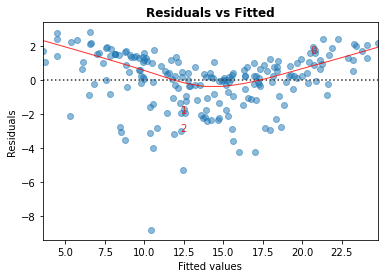

In [28]:
cls.residual_plot();

**B. Standarized Residual vs Theoretical Quantile**

Esto es para chequear visualmente si los residuos están distribuidos normal.

la dispersión sobre la línea diagonal nos sugiere que sí.

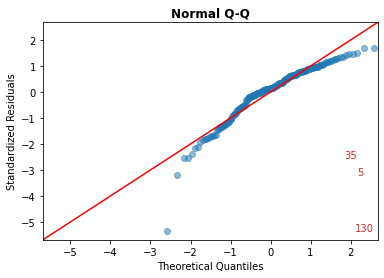

In [29]:
cls.qq_plot();

**C. Sqrt(Standarized Residual) vs Fitted values**

Este gráfico es para chequear homoscedasticidad de los residuos.

Una línea casi horizontal roja en el gráfico lo sugeriría.

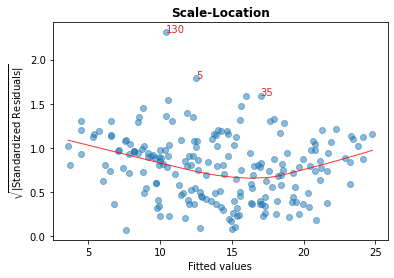

In [30]:
cls.scale_location_plot();

**D. Residual vs Leverage**

Los puntos que caen fuera de las curvas de distancia de Cook curves son considerados observaciones que serían influyentes



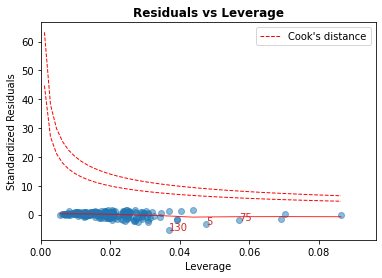

In [31]:
cls.leverage_plot();

**E. VIF**

El variance inflation factor (VIF), es una medida de multicolinealidad.

VIF > 5 para una variable indica que es altamente colineal con las otras variables explicativas.

In [32]:
cls.vif_table()

    Features  VIF Factor
1         TV        1.00
2      Radio        1.14
3  Newspaper        1.15
0  Intercept        6.85


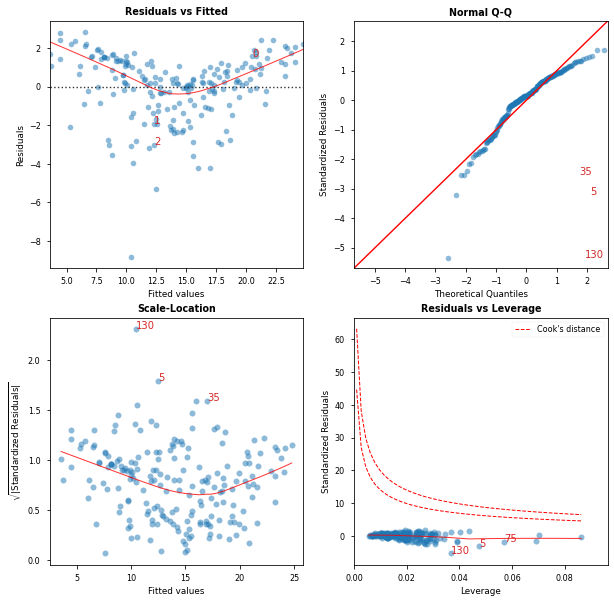

    Features  VIF Factor
1         TV        1.00
2      Radio        1.14
3  Newspaper        1.15
0  Intercept        6.85


In [33]:
# Alternatively, all diagnostics can be generated in one go as follows.
# Fig and ax can be used to modify axes or plot properties after the fact.
cls = Linear_Reg_Diagnostic(res)
fig, ax = cls()

#fig.savefig('../../docs/source/_static/images/linear_regression_diagnostics_plots.png')

## “TODOS LOS MODELOS ESTÁN MAL, PERO ALGUNOS SON ÚTILES” -GEORGE E.P. BOX
La verdad es que ningún modelo es perfecto. Sin embargo, incluso los modelos imperfectos pueden ser útiles. Informar sobre un modelo defectuoso puede ser razonable siempre que seamos claros e informemos las deficiencias del modelo.
